In [1]:
import os
import sys
import numpy as np
import pickle as pkl
from os.path import join as pjoin
from scipy.stats.stats import pearsonr
from matplotlib import pyplot as plt
from statsmodels.stats.multitest import multipletests
from magicbox.algorithm.plot import MidpointNormalize
from cxy_visual_dev.lib.predefine import proj_dir, Atlas, get_rois

anal_dir = pjoin(proj_dir, 'analysis')
work_dir = pjoin(anal_dir, 'plot/RSM')
if not os.path.isdir(work_dir):
    os.makedirs(work_dir)

# show image for 一般矩阵

In [2]:
def plot_mat(fpath, rows, cols, mtc, out_file, figsize, title, show_value, show_name, show_grid, show_cbar,
             row_names=None, col_names=None, cbar_orientation='vertical', cbar_shrink=1.0):
    """
    show image for 一般矩阵

    Args:
        fpath ([type]): [description]
        rows ([type]): [description]
        cols ([type]): [description]
        mtc ([type]): [description]
        out_file ([type]): [description]
        figsize ([type]): [description]
        title ([type]): [description]
        show_value ([type]): [description]
        show_name ([type]): [description]
        show_grid ([type]): [description]
        show_cbar ([type]): [description]
    """
    if isinstance(fpath, str):
        data = pkl.load(open(fpath, 'rb'))
    elif isinstance(fpath, dict):
        data = fpath
    else:
        raise ValueError

    if rows == 'all':
        rows = data['row_name']
    n_row = len(rows)
    if cols == 'all':
        cols = data['col_name']
    n_col = len(cols)
    row_indices = [data['row_name'].index(i) for i in rows]
    col_indices = [data['col_name'].index(i) for i in cols]
    r_arr = data['r'][row_indices][:, col_indices]
    p_arr = data['p'][row_indices][:, col_indices]
    if mtc:
        for row_idx in range(n_row):
            reject, p_arr[row_idx], alpha_sidak, alpha_bonf = \
                multipletests(p_arr[row_idx], 0.05, 'fdr_bh')
    p_mask = p_arr < 0.05

    fig, ax = plt.subplots(figsize=figsize)
    xticks = np.arange(n_col)
    yticks = np.arange(n_row)
    img = ax.imshow(r_arr, 'coolwarm', norm=MidpointNormalize(midpoint=0.))
    if row_names is None:
        row_names = rows
    if col_names is None:
        col_names = cols
    if show_cbar:
        fig.colorbar(img, orientation=cbar_orientation, shrink=cbar_shrink)
    if show_name:
        ax.set_xticks(xticks)
        ax.set_xticklabels(col_names)
        plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
                rotation_mode="anchor")
        plt.setp(ax.get_yticklabels(), rotation=45, ha="right",
                rotation_mode="anchor")
        ax.set_yticks(yticks)
        ax.set_yticklabels(row_names)
    else:
        ax.tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)
    ax.set_title(title)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

    if show_grid:
        grid_xticks = np.r_[xticks-.5, xticks[-1]+.5]
        grid_yticks = np.r_[yticks-.5, yticks[-1]+.5]
        ax.set_xticks(grid_xticks, minor=True)
        ax.set_yticks(grid_yticks, minor=True)
        ax.grid(which="minor", color="w", linestyle='-', linewidth=1.5)
        ax.tick_params(which="minor", bottom=False, left=False)

    if show_value:
        for i in range(n_row):
            for j in range(n_col):
                # if isinstance(r_arr[i, j], np.ma.core.MaskedConstant):
                if np.isnan(r_arr[i, j]):
                    continue

                if p_mask[i, j]:
                    weight = 'bold'
                else:
                    weight = None

                ax.text(j, i, '{:.2f}'.format(r_arr[i, j]),
                        ha="center", va="center", color="k", weight=weight)

    fig.tight_layout()
    if out_file is None:
        fig.show()
    else:
        fig.savefig(out_file)

## RSM10

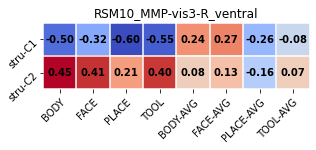

In [7]:
figsize = (4.5, 2)
Hemi = 'R'
local_name = 'ventral'  # ('all', 'early', 'dorsal', 'lateral', 'ventral')
fpath = pjoin(anal_dir, f'RSM/RSM10_MMP-vis3-{Hemi}.pkl')
out_name = f'RSM10_MMP-vis3-{Hemi}_{local_name}'
out_file = pjoin(work_dir, f'{out_name}.jpg')
rows = ['stru-C1', 'stru-C2']
copes = ['BODY', 'FACE', 'PLACE', 'TOOL',
         'BODY-AVG', 'FACE-AVG', 'PLACE-AVG', 'TOOL-AVG']

if local_name == 'all':
    cols = copes
else:
    cols = [f'{Hemi}_{local_name}_{i}' for i in copes]
col_names = copes

data = pkl.load(open(fpath, 'rb'))
plot_mat(data, rows, cols, mtc=False, out_file=out_file, figsize=figsize, title=out_name,
         show_value=True, show_name=True, show_grid=True, show_cbar=False, col_names=col_names)

## RSM9

### 0

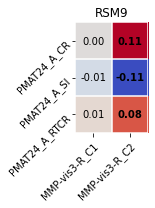

In [4]:
# figsize=(9, 6)
# fname = 'RSM9'
# pc_names = ('C1', 'C2')
# atlas = Atlas('MMP-vis3-EDMV')
# rows = ['PMAT24_A_CR', 'PMAT24_A_SI', 'PMAT24_A_RTCR',
#         'Mars_Log_Score', 'Mars_Errs', 'Mars_Final',
#         'EVA_Num', 'EVA_Denom', 'Correction']
# cols = [f'{i}_weight_M' for i in pc_names]
# cols.extend([f'{i}_abs(weight)_M' for i in pc_names])
# cols.extend([f'{i}_weight_T' for i in pc_names])
# cols.extend([f'{i}_abs(weight)_T' for i in pc_names])
# cols.extend([f'MMP-vis3-R_{i}' for i in pc_names])
# cols.extend([f'{i}_{j}' for i in atlas.roi2label.keys() if 'R_' in i for j in pc_names])

figsize=(2.5, 3)
fname = 'RSM9'
pc_names = ('C1', 'C2')
rows = ['PMAT24_A_CR', 'PMAT24_A_SI', 'PMAT24_A_RTCR']
cols = [f'MMP-vis3-R_{i}' for i in pc_names]

fpath = pjoin(anal_dir, f'RSM/{fname}.pkl')
plot_mat(fpath=fpath, rows=rows, cols=cols, mtc=False, 
         out_file=pjoin(work_dir, f"{fname}.jpg"),
         figsize=figsize, title=fname, show_name=True,
         show_value=True, show_grid=True, show_cbar=False)

### 1

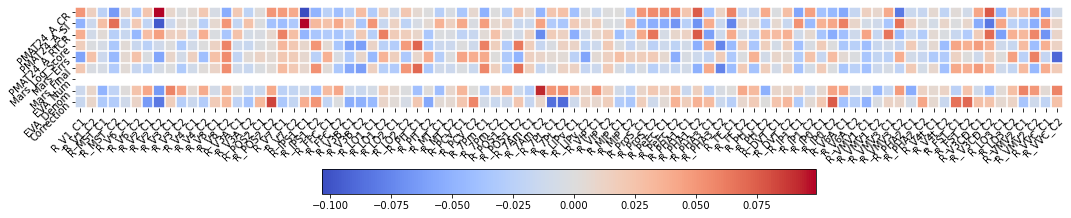

In [10]:
figsize=(15, 6)
fname = 'RSM9'
pc_names = ('C1', 'C2')
rows = ['PMAT24_A_CR', 'PMAT24_A_SI', 'PMAT24_A_RTCR',
        'Mars_Log_Score', 'Mars_Errs', 'Mars_Final',
        'EVA_Num', 'EVA_Denom', 'Correction']
cols = [f'{i}_{j}' for i in get_rois('MMP-vis3-R') for j in pc_names]

fpath = pjoin(anal_dir, f'RSM/{fname}.pkl')
plot_mat(fpath=fpath, rows=rows, cols=cols, mtc=False, 
         out_file=pjoin(work_dir, f"{fname}-1.jpg"),
         figsize=figsize, title=None, show_name=True,
         show_value=False, show_grid=True, show_cbar=True,
         cbar_orientation='horizontal', cbar_shrink=0.5)

## RSM7

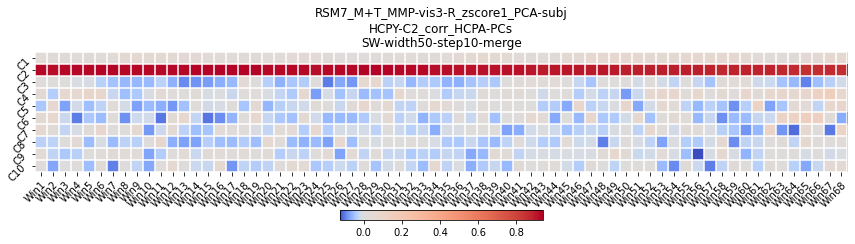

In [4]:
# n_win = 61
# dataset_name = 'HCPD'

n_win = 68
dataset_name = 'HCPA'

figsize=(12, 3.8)
hcpy_pc_name = 'C2'
title1 = 'RSM7_M+T_MMP-vis3-R_zscore1_PCA-subj'
title2 = f'HCPY-{hcpy_pc_name}_corr_{dataset_name}-PCs'
title3 = 'SW-width50-step10-merge'
rows = 'all'
cols = [f'HCPY-{hcpy_pc_name}_corr_Win{i}' for i in range(1, n_win + 1)]
col_names = [f'Win{i}' for i in range(1, n_win + 1)]

fpath = pjoin(anal_dir, f'RSM/{title1}_HCPY_corr_{dataset_name}_{title3}.pkl')
plot_mat(fpath=fpath, rows=rows, cols=cols, mtc=False, 
         out_file=pjoin(work_dir, f"RSM7_{title2}.jpg"),
         figsize=figsize, title=f'{title1}\n{title2}\n{title3}', show_name=True,
         show_value=False, show_grid=True, show_cbar=True, col_names=col_names,
         cbar_orientation='horizontal', cbar_shrink=0.25)


## RSM5/6

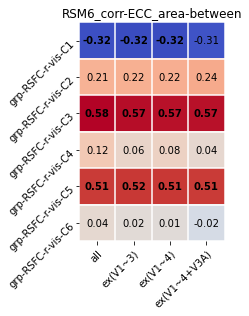

In [24]:
# figsize=(3.5, 2.5)
# fname = 'RSM5_corr-ECC_area'
# rows = ['stru-C1', 'stru-C2']
# cols = ['R_V1', 'R_V2', 'R_V3', 'R_V4', 'R_V3A']

# figsize=(4.5, 4.5)
# fname = 'RSM5_corr-ECC_area'
# rows = [f'grp-RSFC-r-vis-z-C{i}' for i in range(1, 7)]
# cols = ['R_V1', 'R_V2', 'R_V3', 'R_V4', 'R_V3A']

# figsize=(3, 2.5)
# fname = 'RSM6_corr-ECC_area-between'
# rows = ['stru-C1', 'stru-C2']
# cols = 'all'

figsize=(4, 4.5)
fname = 'RSM6_corr-ECC_area-between'
rows = [f'grp-RSFC-r-vis-C{i}' for i in range(1, 7)]
cols = 'all'

fpath = pjoin(anal_dir, f'RSM/{fname}.pkl')
plot_mat(fpath=fpath, rows=rows, cols=cols, mtc=False, 
        out_file=pjoin(work_dir, f"{fname}.jpg"),
        figsize=figsize, title=fname, show_name=True,
        show_value=True, show_grid=True, show_cbar=False)

## RSM1

### single figure

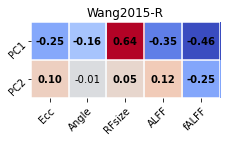

In [9]:
fname = 'Wang2015-R'
fpath = pjoin(anal_dir, f'RSM/RSM1_{fname}.pkl')

figsize = (4.6, 2)
rows = ['stru-C1', 'stru-C2']
cols = ['Eccentricity', 'Angle', 'RFsize', 'ALFF', 'fALFF']
row_names = ['PC1', 'PC2']
col_names = ['Ecc', 'Angle', 'RFsize', 'ALFF', 'fALFF']

# figsize = (4.6, 2.8)
# rows = ['stru-C1', 'stru-C2']
# cols = ['distFromCS1', 'distFromOP', 'distFromMT', 'distFromCalc+MT', 'distFromCalc+MT=V4', 'distFromOP+MT', 'distFromOP+MT=V4', 'distFromSeedv3', 'distFromSeedv4']
# row_names = ['PC1', 'PC2']
# col_names = ['CS', 'OP', 'MT', 'CS+MT', 'CS+MT=V4',
#              'OP+MT', 'OP+MT=V4', 'Seedv3', 'Seedv4']

# figsize = (4.5, 4.5)
# rows = [f'grp-RSFC-r-vis-z-C{i}' for i in range(1, 7)]
# cols = [f'grp-RSFC-r-all-z-C{i}' for i in range(1, 7)]

# figsize = (4, 1.8)
# rows = ['stru-C1', 'stru-C2']
# cols = [f'avg-RSFC-vis-z-C{i}' for i in range(1, 7)]
# row_names = None
# col_names = [f'C{i}' for i in range(1, 7)]

# figsize = (4, 2)
# rows = ['stru-C1', 'stru-C2']
# cols = ['fALFF', 'fAslow5', 'fAslow4', 'fAslow3', 'fAslow2', 'fAslow1']

# figsize = (4.5, 4.5)
# rows = [f'avg-RSFC-vis-z-C{i}' for i in range(1, 7)]
# cols = ['ALFF', 'Aslow5', 'Aslow4', 'Aslow3', 'Aslow2', 'Aslow1']
# row_names = None
# col_names = None

# figsize = (4, 2.8)
# rows = ['Eccentricity', 'Angle', 'RFsize']
# cols = [f'avg-RSFC-vis-z-C{i}' for i in range(1, 7)]
# row_names = None
# col_names = None

# figsize = (3.5, 3.5)
# rows = [f'avg-RSFC-vis-C{i}' for i in range(1, 7)]
# cols = [f'avg-RSFC-vis-W{i}' for i in range(1, 7)]
# row_names = [f'C{i}' for i in range(1, 7)]
# col_names = [f'W{i}' for i in range(1, 7)]

plot_mat(fpath=fpath, rows=rows, cols=cols, mtc=False, 
         out_file=pjoin(work_dir, f"RSM1_{fname}.jpg"),
         figsize=figsize, title=fname, show_name=True,
         show_value=True, show_grid=True, show_cbar=False,
         row_names=row_names, col_names=col_names)

### loop mask_name

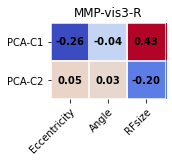

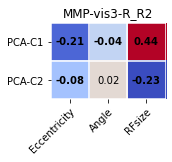

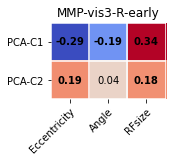

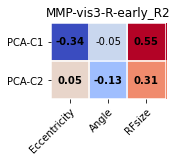

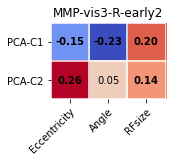

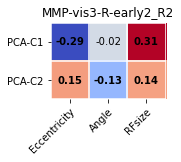

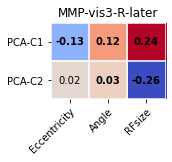

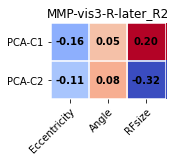

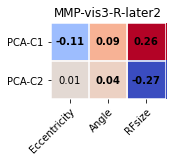

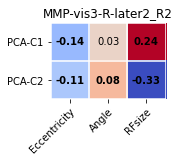

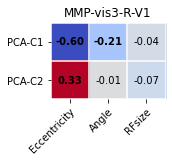

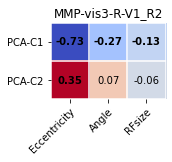

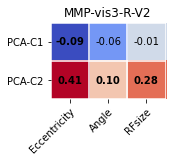

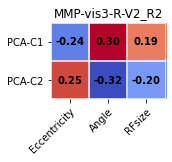

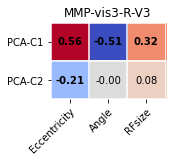

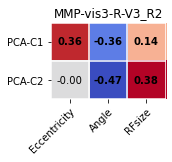

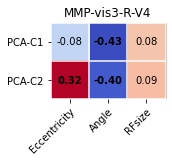

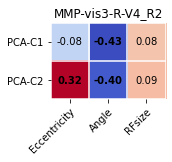

In [10]:
fnames = [
    'MMP-vis3-R', 'MMP-vis3-R-early', 'MMP-vis3-R-early2',
    'MMP-vis3-R-later', 'MMP-vis3-R-later2',
    'MMP-vis3-R-V1', 'MMP-vis3-R-V2',
    'MMP-vis3-R-V3', 'MMP-vis3-R-V4',
]
rows = ['PCA-C1', 'PCA-C2']
cols = ['Eccentricity', 'Angle', 'RFsize']
for fname in fnames:
    fpath1 = pjoin(anal_dir, f'RSM/RSM1_{fname}.pkl')
    fpath2 = pjoin(anal_dir, f'RSM/RSM1_{fname}_R2.pkl')
    plot_mat(
        fpath=fpath1, rows=rows, cols=cols, mtc=False, 
        out_file=pjoin(work_dir, f"RSM1_{fname}.jpg"),
        figsize=(2.5, 2.5), title=fname, show_name=True,
        show_value=True, show_grid=True, show_cbar=False)
    plot_mat(
        fpath=fpath2, rows=rows, cols=cols, mtc=False, 
        out_file=pjoin(work_dir, f"RSM1_{fname}_R2.jpg"),
        figsize=(2.5, 2.5), title=f'{fname}_R2', show_name=True,
        show_value=True, show_grid=True, show_cbar=False)

# show image for 对称矩阵

In [2]:
def plot_sym_mat(fpath, items, mtc, out_file, figsize, title, show_value, show_name, show_grid, show_cbar):
    """
    show image for 对称矩阵

    Args:
        fpath ([type]): [description]
        items ([type]): [description]
        mtc ([type]): [description]
        out_file ([type]): [description]
        figsize ([type]): [description]
        title ([type]): [description]
        show_value ([type]): [description]
        show_name ([type]): [description]
        show_grid ([type]): [description]
        show_cbar ([type]): [description]
    """
    data = pkl.load(open(fpath, 'rb'))
    assert data['row_name'] == data['col_name']
    if items == 'all':
        items = data['row_name']
    n_item = len(items)
    item_indices = [data['row_name'].index(i) for i in items]
    r_arr = data['r'][item_indices][:, item_indices]
    p_arr = data['p'][item_indices][:, item_indices]
    diag_mask = np.eye(n_item, dtype=bool)
    if mtc:
        tril_mask = np.tri(n_item, k=-1, dtype=bool)
        reject, p_arr[tril_mask], alpha_sidak, alpha_bonf = \
            multipletests(p_arr[tril_mask], 0.05, 'fdr_bh')

        triu_mask = tril_mask.T
        p_arr[triu_mask] = p_arr.T[triu_mask]
    p_mask = p_arr < 0.05

    # r_arr = np.ma.array(data['r'], mask=diag_mask)
    r_arr[diag_mask] = np.nan
    fig, ax = plt.subplots(figsize=figsize)
    ticks = np.arange(n_item)
    img = ax.imshow(r_arr, 'coolwarm', norm=MidpointNormalize(midpoint=0.))
    if show_cbar:
        fig.colorbar(img)
    if show_name:
        ax.set_xticks(ticks)
        ax.set_xticklabels(items)
        plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
                rotation_mode="anchor")
        ax.set_yticks(ticks)
        ax.set_yticklabels(items)
    else:
        ax.tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)
    ax.set_title(title)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

    if show_grid:
        grid_ticks = np.r_[ticks-.5, ticks[-1]+.5]
        ax.set_xticks(grid_ticks, minor=True)
        ax.set_yticks(grid_ticks, minor=True)
        ax.grid(which="minor", color="w", linestyle='-', linewidth=1.5)
        ax.tick_params(which="minor", bottom=False, left=False)

    if show_value:
        for i in range(n_item):
            for j in range(n_item):
                # if isinstance(r_arr[i, j], np.ma.core.MaskedConstant):
                if np.isnan(r_arr[i, j]):
                    continue

                if p_mask[i, j]:
                    weight = 'bold'
                else:
                    weight = None

                ax.text(j, i, '{:.2f}'.format(r_arr[i, j]),
                        ha="center", va="center", color="k", weight=weight)

    fig.tight_layout()
    if out_file is None:
        fig.show()
    else:
        fig.savefig(out_file)

MMP-vis3-R-early2
MMP-vis3-R-early2_R2
MMP-vis3-R-later2
MMP-vis3-R-later2_R2
MMP-vis3-R_PC1-N2-1
MMP-vis3-R_PC1-N2-1_R2
MMP-vis3-R_PC1-N2-2
MMP-vis3-R_PC1-N2-2_R2
MMP-vis3-R
MMP-vis3-R_R2


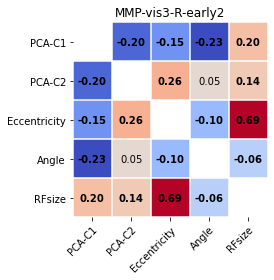

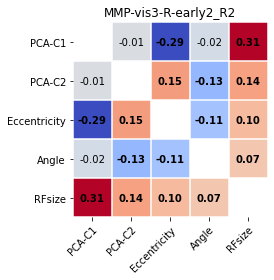

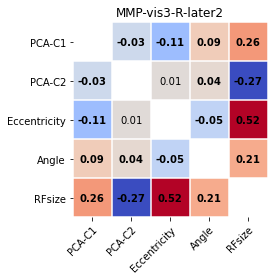

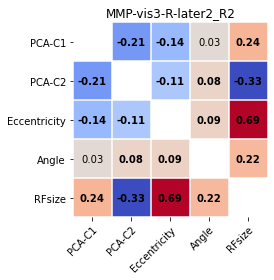

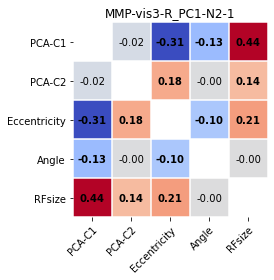

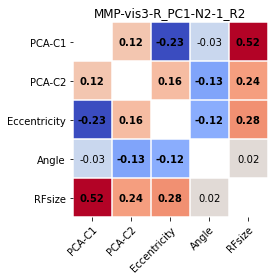

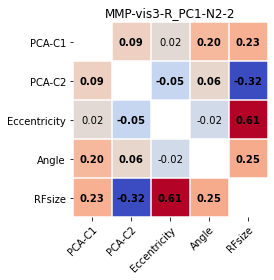

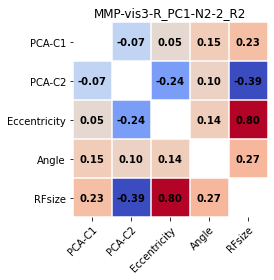

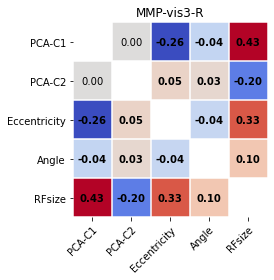

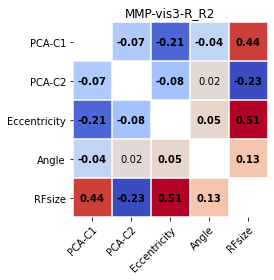

In [5]:
fnames = [
    'MMP-vis3-R-early2', 'MMP-vis3-R-early2_R2', 'MMP-vis3-R-later2',
    'MMP-vis3-R-later2_R2', 'MMP-vis3-R_PC1-N2-1', 'MMP-vis3-R_PC1-N2-1_R2',
    'MMP-vis3-R_PC1-N2-2', 'MMP-vis3-R_PC1-N2-2_R2', 'MMP-vis3-R', 'MMP-vis3-R_R2'
]
items = ('PCA-C1', 'PCA-C2', 'Eccentricity', 'Angle', 'RFsize')

for fname in fnames:
    fpath = pjoin(anal_dir, f'RSM/RSM_{fname}.pkl')
    print(fname)
    plot_sym_mat(
        fpath=fpath, items=items, mtc=True,
        out_file=pjoin(work_dir, f"{fname}.jpg"),
        figsize=(4, 4), title=fname, show_name=True,
        show_value=True, show_grid=True, show_cbar=False)